In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(
   n_samples=1000, n_features=2,
   centers=3, cluster_std=0.7,
   shuffle=True, random_state=0
)

print(y.shape)
print(X.shape)

(1000,)
(1000, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


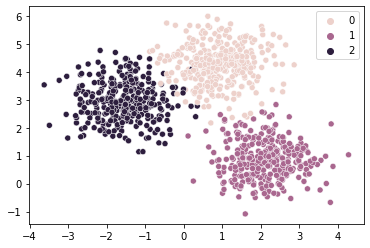

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

In [ ]:
class KMeans():
  def __init__(self, k=2, stopping_condition=0.001, max_iterations=100):
      self.k = k
      self.stopping_condition = stopping_condition
      self.max_iterations = max_iterations

  def initialise_centroids(self, X):
    centroids = []
    for i in range(self.k):
      centroids.append([np.random.uniform(np.min(feature),  np.max(feature)) for feature in X])
    return centroids

  def calc_euclid_distance(self, x, centroid):
      return np.sqrt(np.sum((x - centroid) ** 2))

  def get_closest_centroid(self, X, centroids):
    closest_centroid = []
    for x in X.T:
      distance_list = [self.calc_euclid_distance(x, centroid) for centroid in centroids]
      closest_centroid.append(np.argmin(distance_list))
    return np.array(closest_centroid)

  def update_centroids(self, X, centroid_labels):
    centroids = []
    for i in range(self.k):
      centroids.append([ np.mean(feature[centroid_labels == i])  for feature in X])
    return centroids

  def centroid_movements(self, old_centroid, new_centroid):
    total_movement = 0
    for i in range(len(old_centroid)):
      total_movement += self.calc_euclid_distance(np.array(old_centroid[i]), np.array(new_centroid[i]))
    return total_movement

  def main(self, X):

    # initialise centroids - unfirom between min and max of each feature
    centroids = self.initialise_centroids(X)

    # loop through iterations
    for it in range(1, self.max_iterations):
      centroid_labels = self.get_closest_centroid(X, centroids)

      old_centroids = centroids
      centroids = self.update_centroids(X, centroid_labels)

      if self.centroid_movements(old_centroids, centroids) < self.stopping_condition:
        print(f"Stopping at iteration {it}")
        break

    return centroid_labels


In [ ]:
KM = KMeans(k=3, max_iterations=100)
labels = KM.main(X.T)

Stopping at iteration 8


In [ ]:
import pandas as pd
pd.crosstab(y, labels,  rownames=['Actuals'], colnames=['Predicted'])

Predicted,0,1,2
Actuals,,,
0,5,325,4
1,331,1,1
2,0,7,326


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


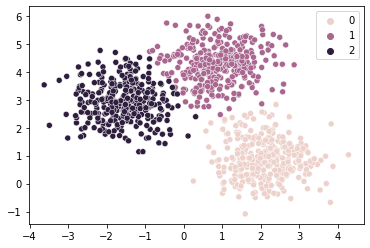

In [ ]:
sns.scatterplot(X[:,0],X[:,1],hue=np.array(labels))